In [33]:
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings('ignore')

In [7]:
fake = Faker()
from faker.providers import BaseProvider

class MyProvider(BaseProvider):
    # define a method that return a random expense type
    def expenseType(self):
        foo = ['Food_Drink', 'Transportation', 'Clothes', 'Rent', 'Entertainment', 'Bills']
        return random.choice(foo)

# then add my new provider to faker instance
fake.add_provider(MyProvider)

In [8]:
def createFakeDataset(num_examples):
    """Fake 데이터 생성하기
    
    Args:
        num_examples (int): int 수 크기의 데이터 생성

    Returns:
        pandas.core.frame.DataFrame: 최종 데이터 세트

    """
    
    l_dates = []
    l_cards = []
    l_types = []
    l_amounts = []
    
    for _ in range(num_examples):
        # create a fake date within a week
        l_dates.append(fake.date_time_between(start_date="-7d", end_date="now", tzinfo=None).date())
        # create a fake card number 
        l_cards.append(fake.credit_card_number())
        # create a fake expenseType
        l_types.append(fake.expenseType())
        # create a fake amount of money
        l_amounts.append(fake.random_int(min=0, max=1000))
        
    # create a dataframe    
    df = pd.DataFrame({'date': l_dates, 'card_number': l_cards, 'type': l_types, 'amount': l_amounts})
    # convert string to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    return df

In [9]:
data = createFakeDataset(10000)
data.head(10)

,date,card_number,type,amount
0,2021-03-09,4207942662357017,Rent,122
1,2021-03-14,4665692897339328757,Bills,86
2,2021-03-10,4509245713186606462,Food_Drink,148
3,2021-03-09,4658987131649050,Entertainment,108
4,2021-03-12,4681935229227758826,Food_Drink,713
5,2021-03-09,38528209434329,Transportation,357
6,2021-03-08,3509520279972076,Transportation,78
7,2021-03-08,4034478000318597703,Rent,101
8,2021-03-15,4739150473708959,Entertainment,948
9,2021-03-13,5285022746183564,Food_Drink,708


### groupby()를 이용한 데이터 정렬

In [16]:
그룹화 = pd.DataFrame(data.groupby(['date','type'])['amount'].count())
그룹화

amount
date       type                  
2021-03-08 Bills              129
           Clothes             99
           Entertainment      104
           Food_Drink         109
           Rent                91
           Transportation      81
2021-03-09 Bills              265
           Clothes            226
           Entertainment      245
           Food_Drink         237
           Rent               274
           Transportation     221
2021-03-10 Bills              222
           Clothes            241
           Entertainment      225
           Food_Drink         225
           Rent               233
           Transportation     260
2021-03-11 Bills              238
           Clothes            239
           Entertainment      274
           Food_Drink         227
           Rent               247
           Transportation     235
2021-03-12 Bills              209
           Clothes            251
           Entertainment      227
           Food_Drink         252
           Rent               278
           Transportation     250
2021-03-13 Bills              223
           Clothes            241
           Entertainment      250
           Food_Drink         261
           Rent               215
           Transportation     227
2021-03-14 Bills              218
           Clothes            254
           Entertainment      239
           Food_Drink         244
           Rent               226
           Transportation     247
2021-03-15 Bills              129
           Clothes            122
           Entertainment      117
           Food_Drink         106
           Rent               146
           Transportation     121

In [17]:
그룹화.unstack()

amount                                                     
type        Bills Clothes Entertainment Food_Drink Rent Transportation
date                                                                  
2021-03-08    129      99           104        109   91             81
2021-03-09    265     226           245        237  274            221
2021-03-10    222     241           225        225  233            260
2021-03-11    238     239           274        227  247            235
2021-03-12    209     251           227        252  278            250
2021-03-13    223     241           250        261  215            227
2021-03-14    218     254           239        244  226            247
2021-03-15    129     122           117        106  146            121

In [19]:
그룹화.unstack()['amount']

type,Bills,Clothes,Entertainment,Food_Drink,Rent,Transportation
date,,,,,,
2021-03-08,129,99,104,109,91,81
2021-03-09,265,226,245,237,274,221
2021-03-10,222,241,225,225,233,260
2021-03-11,238,239,274,227,247,235
2021-03-12,209,251,227,252,278,250
2021-03-13,223,241,250,261,215,227
2021-03-14,218,254,239,244,226,247
2021-03-15,129,122,117,106,146,121


Text(0, 0.5, 'Number of transactions')

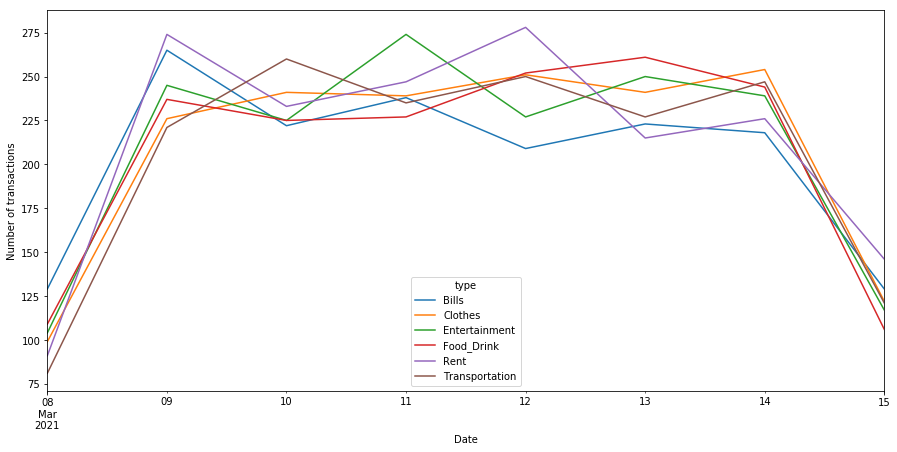

In [21]:
fig,ax = plt.subplots(figsize=(15,7))
그룹화.unstack()['amount'].plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of transactions')

### 요일 변경

In [25]:
import datetime

In [29]:
data

,date,card_number,type,amount
0,2021-03-09,4207942662357017,Rent,122
1,2021-03-14,4665692897339328757,Bills,86
2,2021-03-10,4509245713186606462,Food_Drink,148
3,2021-03-09,4658987131649050,Entertainment,108
4,2021-03-12,4681935229227758826,Food_Drink,713
...,...,...,...,...
9995,2021-03-14,4012683077801959928,Entertainment,495
9996,2021-03-08,3515706485777936,Bills,326
9997,2021-03-15,4267355348740,Rent,387
9998,2021-03-12,3528586969458368,Food_Drink,588


In [34]:
data['day'] = 0
for i in data.index:
    data['day'][i] = data['date'][i].strftime('%A')

In [35]:
data

,date,card_number,type,amount,day
0,2021-03-09,4207942662357017,Rent,122,Tuesday
1,2021-03-14,4665692897339328757,Bills,86,Sunday
2,2021-03-10,4509245713186606462,Food_Drink,148,Wednesday
3,2021-03-09,4658987131649050,Entertainment,108,Tuesday
4,2021-03-12,4681935229227758826,Food_Drink,713,Friday
...,...,...,...,...,...
9995,2021-03-14,4012683077801959928,Entertainment,495,Sunday
9996,2021-03-08,3515706485777936,Bills,326,Monday
9997,2021-03-15,4267355348740,Rent,387,Monday
9998,2021-03-12,3528586969458368,Food_Drink,588,Friday


In [41]:
그룹 = pd.DataFrame(data.groupby(['type','day'])['date'].count())
그룹

date
type           day            
Bills          Friday      209
               Monday      258
               Saturday    223
               Sunday      218
               Thursday    238
               Tuesday     265
               Wednesday   222
Clothes        Friday      251
               Monday      221
               Saturday    241
               Sunday      254
               Thursday    239
               Tuesday     226
               Wednesday   241
Entertainment  Friday      227
               Monday      221
               Saturday    250
               Sunday      239
               Thursday    274
               Tuesday     245
               Wednesday   225
Food_Drink     Friday      252
               Monday      215
               Saturday    261
               Sunday      244
               Thursday    227
               Tuesday     237
               Wednesday   225
Rent           Friday      278
               Monday      237
               Saturday    215
               Sunday      226
               Thursday    247
               Tuesday     274
               Wednesday   233
Transportation Friday      250
               Monday      202
               Saturday    227
               Sunday      247
               Thursday    235
               Tuesday     221
               Wednesday   260

In [51]:
result = 그룹.unstack()['date']

In [52]:
result = result[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']]

In [57]:
result = result.reindex(['Rent','Bills','Clothes','Food_Drink','Entertainment','Transportation','AnotherThings'],fill_value=0)
#float->int 변경 dataframe.astype(int) 

In [58]:
result

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
type,,,,,,,
Rent,237,274,233,247,278,215,226
Bills,258,265,222,238,209,223,218
Clothes,221,226,241,239,251,241,254
Food_Drink,215,237,225,227,252,261,244
Entertainment,221,245,225,274,227,250,239
Transportation,202,221,260,235,250,227,247
AnotherThings,0,0,0,0,0,0,0


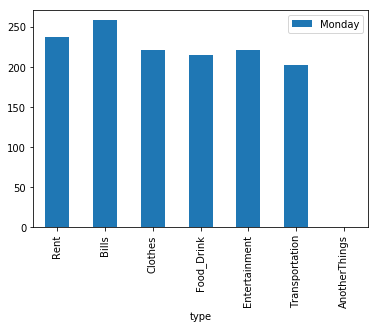

In [66]:
pd.DataFrame(result['Monday']).plot(kind='bar')

In [68]:
result

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
type,,,,,,,
Rent,237,274,233,247,278,215,226
Bills,258,265,222,238,209,223,218
Clothes,221,226,241,239,251,241,254
Food_Drink,215,237,225,227,252,261,244
Entertainment,221,245,225,274,227,250,239
Transportation,202,221,260,235,250,227,247
AnotherThings,0,0,0,0,0,0,0


In [72]:
transpo = result.transpose()

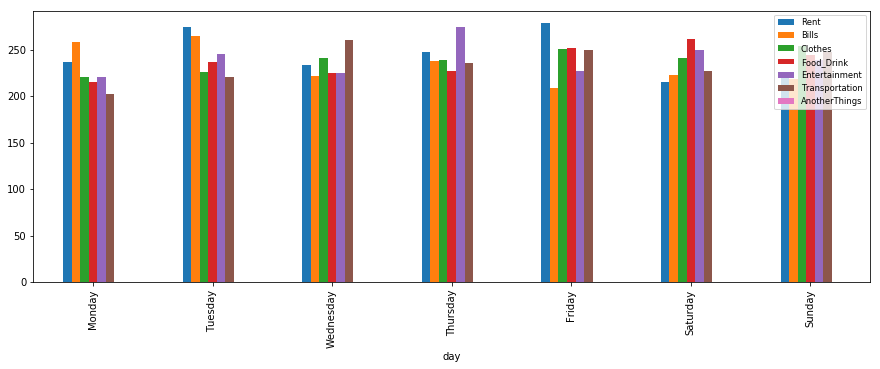

In [94]:
plt.rcParams["figure.figsize"] = (15,5)
transpo.plot(kind='bar')
plt.legend(fontsize='small')
plt.show()